**Seungjae Lee and Michael Yu Proj 3 Extensions**

In [93]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from optimizer import *
import load_stl10_dataset
import preprocess_data
from network_Copy1 import ConvNet4AccelExt
from network_Copy1 import ConvNet4Accel
import tensorflow as tf
from filter_ops import *

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=6)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 16, 16)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 16, 16)
dev labels shape:  (50,)


We attempted to make a adagrad optimizer. However, we were constantly suck at a low accuracy that wasn't moving. In some of our runs, we were receiving errors about dividing by 0. Also, even though we were only running this notebook, adagrad was signifcantly slower than all of the other optimizers in going through the data. 

In [137]:
#adagrad 
adam_loss = None
adam_train_acc = None
adam_val_acc = None
net1 = ConvNet4Accel(input_shape=(3, 16,16), wt_scale = 0.0001)
net1.compile('adam', lr = 0.01)
adam_loss, adam_train_acc, adam_val_acc = net1.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=25, n_epochs=500, acc_freq=10)

Starting to train...
1000 iterations. 2 iter/epoch.


ValueError: ('Error! Unknown activation function ', 'sigmoid')

In [25]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=3)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 32, 32)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 32, 32)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 32, 32)
dev labels shape:  (50,)


In [29]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

We tried using a different dataset with our network. We are using the mnist dataset which consists of handwritten digits from 0 to 9. 

In [104]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [105]:
#because of the large size and also issues with using our accelerated network, we decided to train using the test set.
#we also ended up validating with the test set too, which made the validation accuracy useless. A smarter thing to have 
#done was to split one of the x_data into a validation set. Hindsight is 2020

#getting the shapes correct 
x_test = np.expand_dims(x_test, axis = 1)


In [106]:
an_loss = None
an_train_acc = None
an_val_acc = None

# accel_net2 = ConvNet4(input_shape = (1,28,28), wt_scale = 0.00001)
# accel_net2.compile('adam', lr = 0.0002)

an_loss, an_train_acc, an_val_acc = accel_net2.fit(x_test, y_test,x_test, y_test,mini_batch_sz=32, n_epochs=10, acc_freq=4)

Starting to train...
3120 iterations. 312 iter/epoch.
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
Time taken for iteration 0:  0.2861848751703898
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.092, Val acc: 0.084
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.12, Val acc: 0.106
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.218, Val acc: 0.246
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train ac

pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.828, Val acc: 0.86
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.816, Val acc: 0.878
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.842, Val acc: 0.848
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
  Train acc: 0.87, Val acc: 0.86
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape is (32, 1, 34, 34)
pad_x=3, pad_y=3
Padded shape 

KeyboardInterrupt: 

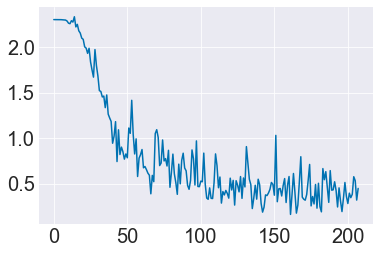

In [115]:
plt.xlabel = 'Iterations'
plt.ylabel = 'Loss'
plt.title = 'Loss over Iterations'
plt.plot(accel_net2.loss_history)
plt.show()

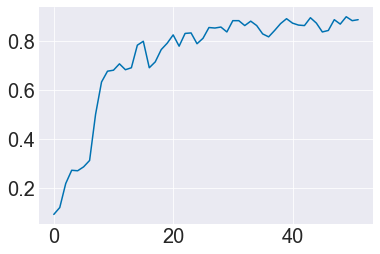

In [116]:
plt.plot(accel_net2.train_acc_history)
plt.xlabel = "Epochs"
plt.ylabel = "Training Accuracy"
plt.title = "Training Accuracy over Epochs"
plt.show()